# Table of Contents
 <p><div class="lev1 toc-item"><a href="#DATA:" data-toc-modified-id="DATA:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA:</a></div><div class="lev1 toc-item"><a href="#exploration" data-toc-modified-id="exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>exploration</a></div><div class="lev2 toc-item"><a href="#plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)" data-toc-modified-id="plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-civilian-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-civilian-fire-arms-per-person-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plot the average number of civilian fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-homicide-by-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-homicide-by-fire-arms-per-person-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plot the average number of homicide by fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev1 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></div><div class="lev2 toc-item"><a href="#fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person." data-toc-modified-id="fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person.-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them" data-toc-modified-id="Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Extra credit: calculate the confidence interval by hand and also plot them</a></div><div class="lev2 toc-item"><a href="#Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot." data-toc-modified-id="Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot.-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Use the stsatsmodels.gaphics package to plot the influence plot.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences" data-toc-modified-id="Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences</a></div><div class="lev2 toc-item"><a href="#Discuss-your-findings" data-toc-modified-id="Discuss-your-findings-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Discuss your findings</a></div>

**regression exercise**

**written by Federica B Bianco CUSP 2017**

**for PUI lecture on models and linear regression**

**investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP**

# DATA: 

The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to me reproducible.

Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")

Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

In [58]:
import numpy as np
import pandas as pd
import io
import requests
import pylab as pl
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [13]:
url = 'http://raw.githubusercontent.com/fedhere/PUI2017_fb55/master/HW5_fb55/World%20firearms%20murders%20and%20ownership%20-%20Sheet%201.csv'
s=requests.get(url).content
df1 = pd.read_csv(io.StringIO(s.decode('utf-8')))
df1.head()

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0
1,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0
2,Angola,AO,NaN,NaN,NaN,NaN,34.0,17.3,2800000.0
3,Anguilla,AI,WHO-MDB,24.0,1.0,7.14,NaN,NaN,NaN
4,Argentina,AR,Ministry of Justice,52.0,1198.0,3.02,62.0,10.2,3950000.0


In [19]:
# downloaded file and saved as pop.csv in HW5 directory
df2 = pd.read_csv('pop.csv',  skiprows=4)
df2.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,NaN


In [18]:
# download file and saved as shooters.csv in HW5 directory
df3 = pd.read_csv('shooters.csv')
df3.head()

,Country,Guns/100 inhabitants,Number of mass shootings
0,Australia,15.0,4
1,Austria,30.4,1
2,Beligium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


In [23]:
df_12 = df1.merge(df2, how='inner', right_on="Country Name", left_on="Country/Territory")
df_12.head()

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms,Country Name,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
0,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0,Albania,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,NaN
1,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0,Algeria,...,34860715.0,35465760.0,36117637.0,36819558.0,37565847.0,38338562.0,39113313.0,39871528.0,40606052.0,NaN
2,Angola,AO,NaN,NaN,NaN,NaN,34.0,17.3,2800000.0,Angola,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,NaN
3,Argentina,AR,Ministry of Justice,52.0,1198.0,3.02,62.0,10.2,3950000.0,Argentina,...,40382389.0,40799407.0,41223889.0,41656879.0,42096739.0,42539925.0,42981515.0,43417765.0,43847430.0,NaN
4,Armenia,AM,CTS,13.0,9.0,0.29,52.0,12.5,380000.0,Armenia,...,2908220.0,2888584.0,2877311.0,2875581.0,2881922.0,2893509.0,2906220.0,2916950.0,2924816.0,NaN


In [74]:
df_all = df_12.merge(df3, how = 'inner', right_on = 'Country', left_on="Country/Territory")

# Change 2012 pop to 'pop'
df_all = df_all.rename(columns={'2012': 'population',})


In [75]:
# looks like I need to add in gdp from 2012
# downloaded and put in a file gdp.csv
df4 = pd.read_csv('gdp.csv',  skiprows=4)
df4.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.004633e+10,2.005019e+10,1.970299e+10,1.946902e+10,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.417803e+10,7.549238e+10,8.247091e+10,1.041159e+11,1.153984e+11,1.249121e+11,1.267769e+11,1.029622e+11,8.963316e+10,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.278103e+10,1.321986e+10,1.139037e+10,1.192689e+10,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.001201e+09,3.650083e+09,3.346517e+09,3.427023e+09,3.146152e+09,3.248925e+09,NaN,NaN,NaN,NaN


In [76]:
df_all = df_all.merge(df4, how = 'inner', right_on = 'Country Name', left_on="Country/Territory")
df_all.head()

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms,Country Name_x,...,2008_y,2009_y,2010_y,2011_y,2012,2013_y,2014_y,2015_y,2016_y,Unnamed: 61_y
0,Australia,AU,NSO,11.5,30.0,0.14,42.0,15.0,3050000.0,Australia,...,1.055335e+12,9.271683e+11,1.142877e+12,1.390557e+12,1.538194e+12,1.567179e+12,1.459598e+12,1.345383e+12,1.204616e+12,NaN
1,Austria,AT,CTS,29.5,18.0,0.22,14.0,30.4,2500000.0,Austria,...,4.276115e+11,3.975943e+11,3.902119e+11,4.290374e+11,4.074516e+11,4.282484e+11,4.383762e+11,3.769674e+11,3.864278e+11,NaN
2,Canada,CA,CTS,32.0,173.0,0.51,13.0,30.8,9950000.0,Canada,...,1.549131e+12,1.371153e+12,1.613464e+12,1.788648e+12,1.824289e+12,1.842628e+12,1.792883e+12,1.552808e+12,1.529760e+12,NaN
3,Denmark,DK,CTS,31.9,15.0,0.27,54.0,12.0,650000.0,Denmark,...,3.533611e+11,3.212414e+11,3.219954e+11,3.440032e+11,3.271489e+11,3.435844e+11,3.522970e+11,3.013078e+11,3.061429e+11,NaN
4,Finland,FI,CTS,19.8,24.0,0.45,4.0,45.3,2400000.0,Finland,...,2.837425e+11,2.514990e+11,2.477998e+11,2.736742e+11,2.567065e+11,2.699801e+11,2.726093e+11,2.323617e+11,2.367850e+11,NaN


In [80]:
# now subset to columns
df_sub = df_all[['Country/Territory', 'Average total all civilian firearms', 'population', 
                 '2012', 'Number of homicides by firearm', 'Guns/100 inhabitants',
                'Number of mass shootings']]
df_sub = df_sub.rename(columns={'2012': 'gdp',})
df_sub

,Country/Territory,Average total all civilian firearms,population,gdp,Number of homicides by firearm,Guns/100 inhabitants,Number of mass shootings
0,Australia,3050000.0,22728254.0,1.538194e+12,30.0,15.0,4
1,Austria,2500000.0,8429991.0,4.074516e+11,18.0,30.4,1
2,Canada,9950000.0,34750545.0,1.824289e+12,173.0,30.8,4
3,Denmark,650000.0,5591572.0,3.271489e+11,15.0,12.0,0
4,Finland,2400000.0,5413971.0,2.567065e+11,24.0,45.3,2
5,France,19000000.0,65659790.0,2.681416e+12,35.0,31.2,6
6,Germany,25000000.0,80425823.0,3.543984e+12,158.0,30.3,7
7,Greece,2500000.0,11045011.0,2.456707e+11,29.0,22.5,0
8,Hungary,560000.0,9920362.0,1.273211e+11,7.0,5.5,0
9,Iceland,90000.0,320716.0,1.421858e+10,0.0,30.3,0


# exploration

## plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


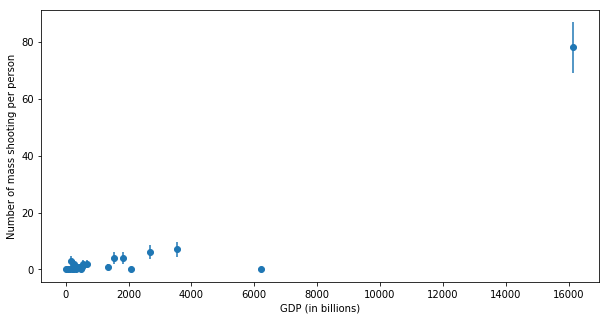

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has both the highest GDP and the highest number of mass shootings


In [81]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_sub.gdp / 1e9, df_sub['Number of mass shootings'])
ax.errorbar(df_sub.gdp / 1e9, df_sub['Number of mass shootings'], 
            yerr = np.sqrt(df_sub['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
pl.show()
print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest GDP and the highest number of mass shootings")

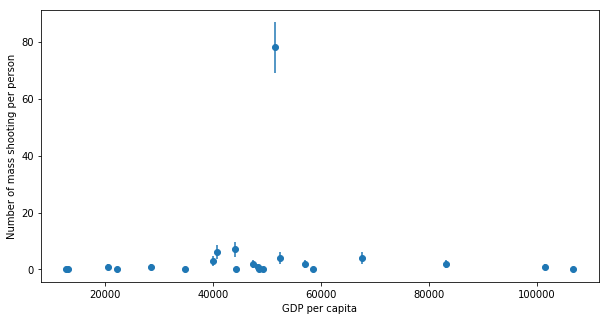

Number of mass shooting vs GDP per capita, errors represent Poisson statistics.
The datapoint to the top middle of the plot is the USA, which has the highest number of mass shootings


In [88]:
# Now for per person
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter((df_sub.gdp / df_sub.population), df_sub['Number of mass shootings'])
ax.errorbar((df_sub.gdp / df_sub.population), df_sub['Number of mass shootings'], 
    yerr = np.sqrt(df_sub['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP per capita")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
pl.show()
print ("Number of mass shooting vs GDP per capita, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top middle of the plot is the USA, " + 
       "which has the highest number of mass shootings")

## plot the average number of civilian fire arms per person
first without errors, then with errors. are there  points that look like outliers?

In [94]:
df_sub['shootingspp'] = df_sub["Number of mass shootings"] / df_sub['population'] * 1e3
df_sub

,Country/Territory,Average total all civilian firearms,population,gdp,Number of homicides by firearm,Guns/100 inhabitants,Number of mass shootings,shootingspp
0,Australia,3050000.0,22728254.0,1.538194e+12,30.0,15.0,4,0.000176
1,Austria,2500000.0,8429991.0,4.074516e+11,18.0,30.4,1,0.000119
2,Canada,9950000.0,34750545.0,1.824289e+12,173.0,30.8,4,0.000115
3,Denmark,650000.0,5591572.0,3.271489e+11,15.0,12.0,0,0.000000
4,Finland,2400000.0,5413971.0,2.567065e+11,24.0,45.3,2,0.000369
5,France,19000000.0,65659790.0,2.681416e+12,35.0,31.2,6,0.000091
6,Germany,25000000.0,80425823.0,3.543984e+12,158.0,30.3,7,0.000087
7,Greece,2500000.0,11045011.0,2.456707e+11,29.0,22.5,0,0.000000
8,Hungary,560000.0,9920362.0,1.273211e+11,7.0,5.5,0,0.000000
9,Iceland,90000.0,320716.0,1.421858e+10,0.0,30.3,0,0.000000


## plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

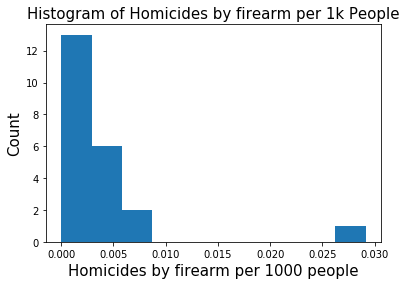

In [104]:
fig, ax = plt.subplots()
ax.hist(df_sub['Number of homicides by firearm'] / df_sub['population'] * 1000)
ax.set_xlabel('Homicides by firearm per 1000 people', fontsize =15);
ax.set_ylabel('Count', fontsize =15);
pl.title('Histogram of Homicides by firearm per 1k People', fontsize =15)

Number of Homicides by firerarm per 1000 people.  The United States is the country on the far right.
The USA has both the highest number of total homicides and per capita homicide of countries in this list.


## plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color
with and without errorbars

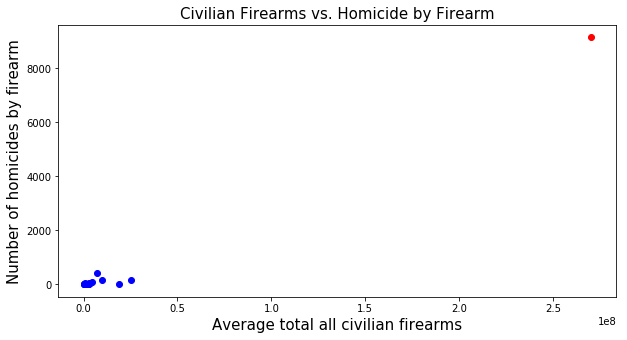

In [139]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter_1 = ax.scatter(df_sub['Average total all civilian firearms'][:21], 
                       df_sub['Number of homicides by firearm'][:21], c='blue')
scatter_2 = ax.scatter(df_sub['Average total all civilian firearms'][21], 
                       df_sub['Number of homicides by firearm'][21], c='red')
ax.set_xlabel("Average total all civilian firearms", fontsize = 15)
ax.set_ylabel("Number of homicides by firearm", fontsize = 15)
pl.title('Civilian Firearms vs. Homicide by Firearm', fontsize =15)

The USA has much more civilian firearms and homicides per year than any of the other countries on in this data.

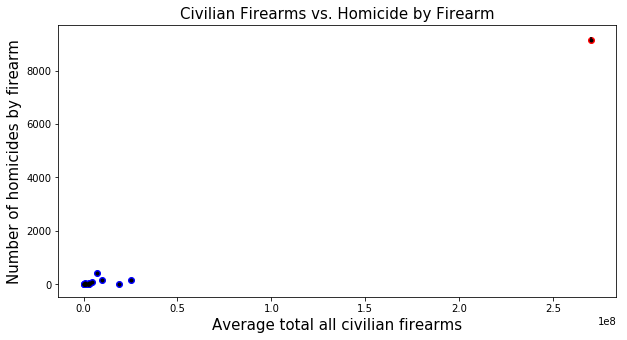

In [140]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter_1 = ax.scatter(df_sub['Average total all civilian firearms'][:21], 
                       df_sub['Number of homicides by firearm'][:21], c='blue')
scatter_2 = ax.scatter(df_sub['Average total all civilian firearms'][21], 
                       df_sub['Number of homicides by firearm'][21], c='red')
ax.errorbar(df_sub['Average total all civilian firearms'], 
    df_sub['Number of homicides by firearm'], 
    yerr = np.sqrt(df_sub['Number of homicides by firearm'] * 1.0), fmt = '.', c= 'black')
ax.set_xlabel("Average total all civilian firearms", fontsize = 15)
ax.set_ylabel("Number of homicides by firearm", fontsize = 15)
pl.title('Civilian Firearms vs. Homicide by Firearm', fontsize =15)

The USA has much more civilian firearms and homicides per year than any of the other countries on in this data. The Error bars are extremely small relative to the number of shootings for the USA.

## plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars

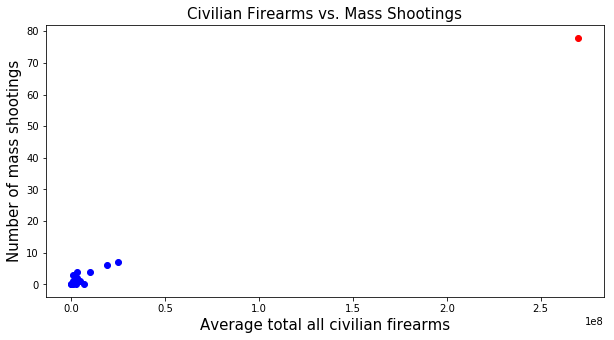

In [141]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter_1 = ax.scatter(df_sub['Average total all civilian firearms'][:21], 
                       df_sub['Number of mass shootings'][:21], c='blue')
scatter_2 = ax.scatter(df_sub['Average total all civilian firearms'][21], 
                       df_sub['Number of mass shootings'][21], c='red')
ax.set_xlabel("Average total all civilian firearms", fontsize = 15)
ax.set_ylabel("Number of mass shootings", fontsize = 15)
pl.title('Civilian Firearms vs. Mass Shootings', fontsize =15)

The USA has far more mass shootings than other countries as well as number of civilian firearms.

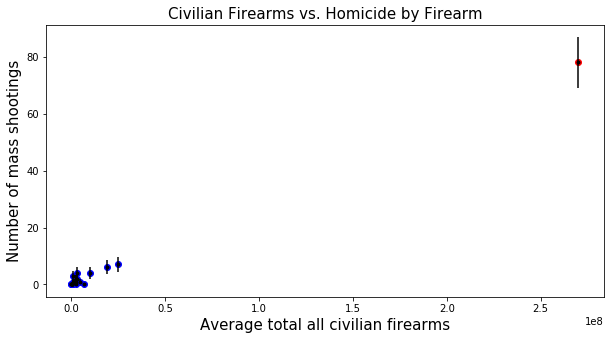

In [142]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter_1 = ax.scatter(df_sub['Average total all civilian firearms'][:21], 
                       df_sub['Number of mass shootings'][:21], c='blue')
scatter_2 = ax.scatter(df_sub['Average total all civilian firearms'][21], 
                       df_sub['Number of mass shootings'][21], c='red')
ax.errorbar(df_sub['Average total all civilian firearms'], 
    df_sub['Number of mass shootings'], 
    yerr = np.sqrt(df_sub['Number of mass shootings'] * 1.0), fmt = '.', c= 'black')
ax.set_xlabel("Average total all civilian firearms", fontsize = 15)
ax.set_ylabel("Number of mass shootings", fontsize = 15)
pl.title('Civilian Firearms vs. Homicide by Firearm', fontsize =15)

 The error bars show a high error is possible for the number of mass shootings in the USA, but still with maximum negative error the US would be well above other countries


# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




In [161]:
import seaborn as sns 
import statsmodels.api as sm

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [147]:
df_sub['civ_arms_per_person'] = df_sub['Average total all civilian firearms'] / df_sub['population']
df_sub['civ_arms_per_person']

0     0.134194
1     0.296560
2     0.286326
3     0.116246
4     0.443298
5     0.289370
6     0.310845
7     0.226347
8     0.056450
9     0.280622
10    0.078484
11    0.117569
12    0.005563
13    0.131840
14    0.209841
15    0.278964
16    0.013399
17    0.085593
18    0.096209
19    0.294137
20    0.425167
21    0.859877
Name: civ_arms_per_person, dtype: float64

In [149]:
df_sub['mass_shoot_per_person'] = df_sub['Number of mass shootings'] / df_sub['population']
df_sub['mass_shoot_per_person']  = df_sub['mass_shoot_per_person'] / np.mean(df_sub['mass_shoot_per_person'])
df_sub['mass_shoot_per_person']
#better dist

0     1.454227
1     0.980192
2     0.951123
3     0.000000
4     3.052477
5     0.755075
6     0.719185
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.000000
13    0.000000
14    5.623519
15    1.646486
16    0.000000
17    0.785843
18    0.176662
19    1.736041
20    2.066564
21    2.052606
Name: mass_shoot_per_person, dtype: float64

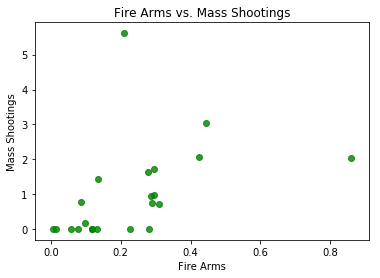

In [156]:
ax = sns.regplot(df_sub['civ_arms_per_person'], df_sub['mass_shoot_per_person'], color="g",  fit_reg=False)
ax.set(xlabel='Fire Arms', ylabel='Mass Shootings', title = 'Fire Arms vs. Mass Shootings')

Scaled Fire arm ownership vs. Scaled Mass Shootings shown without a model

In [177]:
#OLS 
ols_result = sm.regression.linear_model.OLS(df_sub['mass_shoot_per_person'], 
                                            sm.add_constant(df_sub['civ_arms_per_person'])).fit()
beta0_ols, beta1_ols = ols_result.params

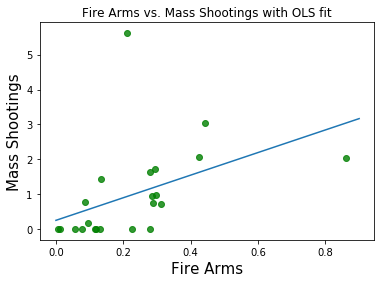

In [215]:
dummy_x = np.linspace(0, 0.9, 100)

sns.regplot(df_sub['civ_arms_per_person'], df_sub['mass_shoot_per_person'], color="g",  fit_reg=False) 
plt.plot(dummy_x, dummy_x * beta1_ols + beta0_ols)
plt.xlabel('Fire Arms', fontsize = 15)
plt.ylabel('Mass Shootings', fontsize = 15)
plt.title('Fire Arms vs. Mass Shootings with OLS fit')
# I could not get the legend to show up

The OLS trendline shows an trend toward an increase in mass shooting for the more civilian owned firearms in a country.

In [248]:
#WLS
# I found the highest non infinity values for weights were 1, so I changed all infinite values to 1
weights = 1 / (np.sqrt(df_sub['Number of mass shootings'] * 1.0))
for i in range(len(weights)):
    if weights[i] > 1 :
        weights[i] = 1

wls_result = sm.regression.linear_model.WLS(df_sub['mass_shoot_per_person'], 
                                            sm.add_constant(df_sub['civ_arms_per_person']), 
                                            weights = weights).fit()
beta0_wls, beta1_wls = wls_result.params

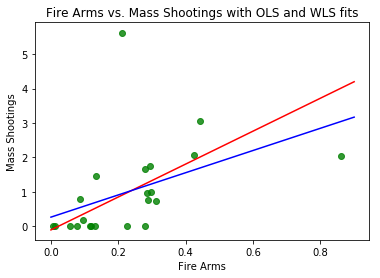

In [249]:
ax = sns.regplot(df_sub['civ_arms_per_person'], df_sub['mass_shoot_per_person'], color="g",  fit_reg=False) 
pl.plot(dummy_x, dummy_x * beta1_wls + beta0_wls, c = 'red')
pl.plot(dummy_x, dummy_x * beta1_ols + beta0_ols, c = 'blue')
ax.set(xlabel='Fire Arms', ylabel='Mass Shootings', title = 'Fire Arms vs. Mass Shootings with OLS and WLS fits')
# I could not get the legend to show up

The OLS trendline shows an trend toward an increase in mass shooting for the more civilian owned firearms in a country. The red trendine is the WLS trendline and the blue trendline is the OLS trendline.

In [267]:
# using np.polyfit i'll try a 3nd degree polynomial
poly_result = np.polyfit(df_sub['mass_shoot_per_person'], df_sub['civ_arms_per_person'], deg=3)
poly_result

array([-0.00984838,  0.03585587,  0.12649256,  0.11052327])

In [271]:
poly_result[1]

0.035855870260839508

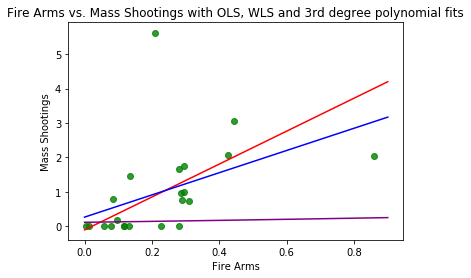

In [270]:
ax = sns.regplot(df_sub['civ_arms_per_person'], df_sub['mass_shoot_per_person'], color="g",  fit_reg=False) 
pl.plot(dummy_x, dummy_x * beta1_wls + beta0_wls, c = 'red')
pl.plot(dummy_x, dummy_x * beta1_ols + beta0_ols, c = 'blue')
pl.plot(dummy_x, (poly_result[0] * (dummy_x ** 3))  + (poly_result[1] * (dummy_x ** 2)) +
       (poly_result[2] * dummy_x)  + poly_result[3], c = 'purple')
ax.set(xlabel='Fire Arms', ylabel='Mass Shootings', title = 'Fire Arms vs. Mass Shootings with OLS, WLS \
and 3rd degree polynomial fits')
# I could not get the legend to show up

The OLS trendline shows an trend toward an increase in mass shooting for the more civilian owned firearms in a country. The red trendine is the WLS trendline, the blue trendline is the OLS trendline, the purple trendline is the 3rd degree polynomial. 

## Extra credit: calculate the confidence interval by hand and also plot them 
you can use pylab.fill_between(x, yfit - ci, yfit + ci, alpha=0.5)

**Confidence intervals: **
there are three type of intervals in a linear regression, plot any one of them all three if you want - how do they compare to the seaborn plot?:

1) Confidence intervals for the parameters slope and intercept

2) Confidence interval for the average y value

3) Prediction interval for a single y value

1) __confidence interval of the  model parameters slope and intercept:__
define sigma as the sum of the residuals over the square root of number n of observations. 

sigma: σ̂ =sqrt(Sum((Yoberved_i−Ypredicted_i)^2)/n)

where the sum is over all observations

Define t_alpha/2,n-2 the t statistics at (1-alpha/2) for a t distribution with n-2 degrees of freedom (you can calculate it with scipy
tp = sp.stats.t.ppf(0.975, n-2)



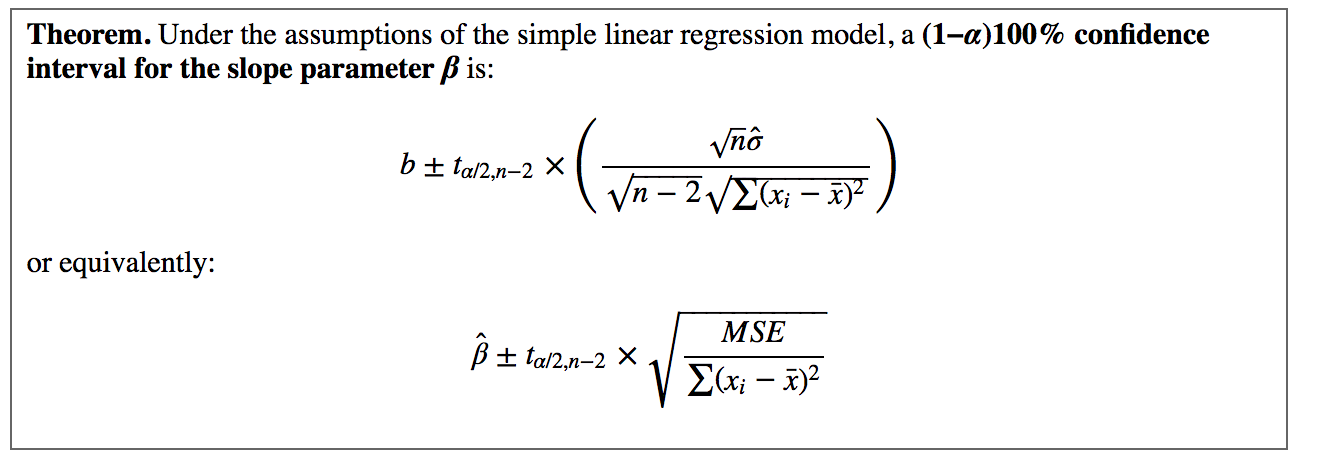

In [29]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression.png")

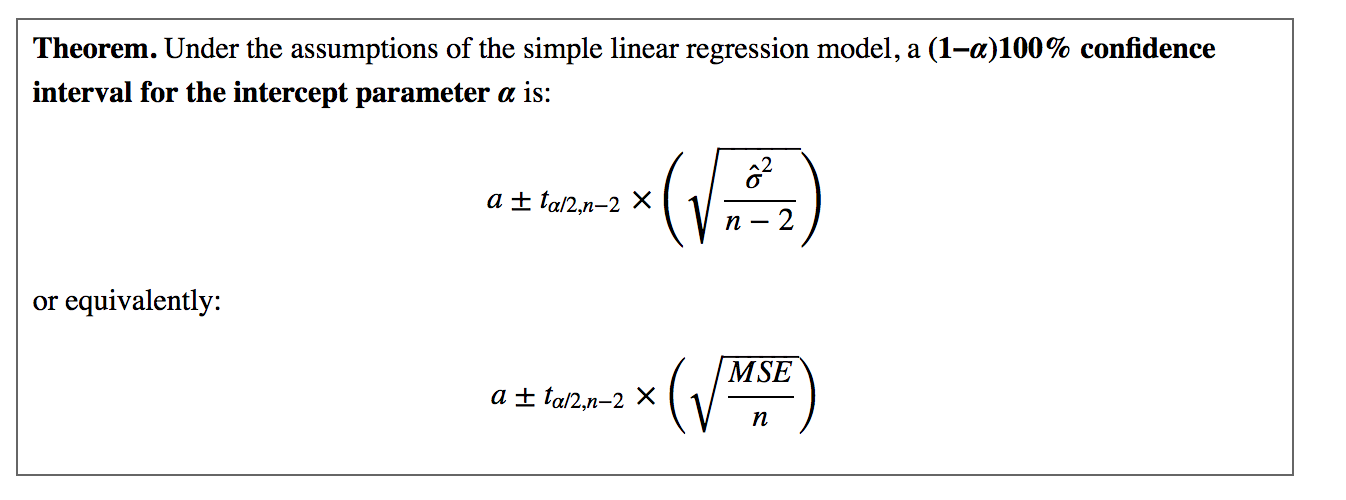

In [30]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression2.png")

[proof](https://onlinecourses.science.psu.edu/stat414/node/280)

2) **A confidence interval for E(y | x) , the expected (average) value of y for a given x_**

define s: residual standard error sy = sqrt(Sum((y_observed-y_predicted)^2)/(n-2))

(note: n-2 is the degrees of freedom of the problem: observations - number of parameters - 1)

the confidence interval for a given y(x*) is: 

y_predicted(x*) +/- t_(alpha/2)(n-2) * sy * sqrt( 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

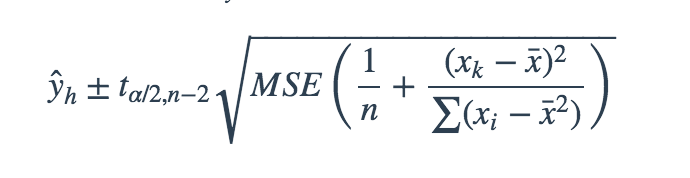

In [33]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciY.png")

3) **Confidence intervals for average y (predicted) values**

y_predicted(x*) +/- t_(n-2) * sy * sqrt( 1 + 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

very similar, but note the +1 in the square root

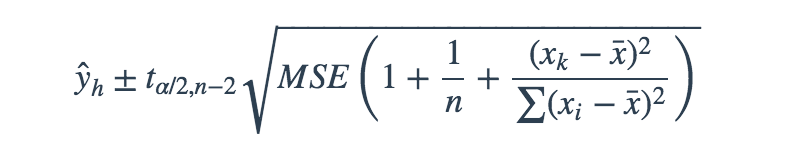

In [32]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciYaverage.png")

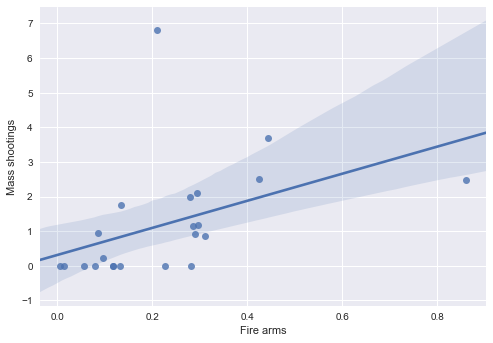

In [66]:
pl.figure()
import seaborn  as sns
sns.regplot(x="x", y="y", data=df_);

pl.ylabel("Mass shootings")
pl.xlabel("Fire arms");

## Use the stsatsmodels.gaphics package to plot the influence plot. 
Read the package documentation to learn how to read this plot and extract the countries with the highest influence

This is the topic of this week's assigned reading, so make sure you do the reading before you do this step. It will help you interpret the plot.

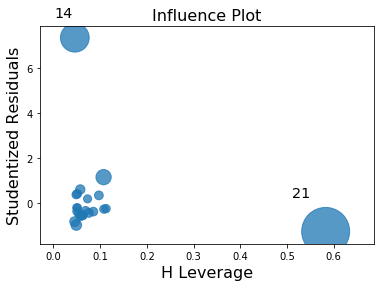

In [273]:
sm.graphics.influence_plot(ols_result, alpha  = 0.05, criterion="cooks");

In this plot we can see that the value from index 21 (USA) has a large leverage. This means that its values are far away from the mean.
This makes sense because the US has a lot more shooting and guns than other countries.  The Y-axis shows the residuals. These show how far away the models predeicted value is from the data.  Our plot shows that the predicted value for index 14 (New Zealand) is very different from the value predicted by the model.

## Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences

## Discuss your findings